## LEKOUNDA NGOLO Mardochet Gédéon
### COOP MSC | DATA SCIENCE 
### ASSIGNEMENT 1 : Machine Learning
### 23-11-2025

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns


In [2]:
import statsmodels.api as sm

In [3]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


In [4]:
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import subplots 

a) Load **college.csv** dataset 

In [5]:
college2 = pd.read_csv('./data/College.csv', index_col=0)

b) Cleanning and transformation

In [6]:
college3 = college2.reset_index()                # ramener la colonne de noms
college3 = college3.rename(columns={'index': 'College'})
college3 = college3.set_index('College')

b. College dataset is loaded , we can first notice that header column index 0 is  empty 
so we replace by college (cause it refers about colleges) 

In [7]:
print(college3.columns)

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')


- Overview of list of all columns, total we have 18 columns that means we deal with 18 explanatory variables

In [8]:
college = college3

Now college containt our dataset (college.csv) 

In [9]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


c) **Describe()** : numerical summary of variable in dataset 

In [10]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### Observation 
First observation of our dataset, we can see all variables and observations of our dataset.  
- describe() show us all of dataset statistic views

d) Scatterplot matrix for **Top10perc**, **Apps** and **Enroll**

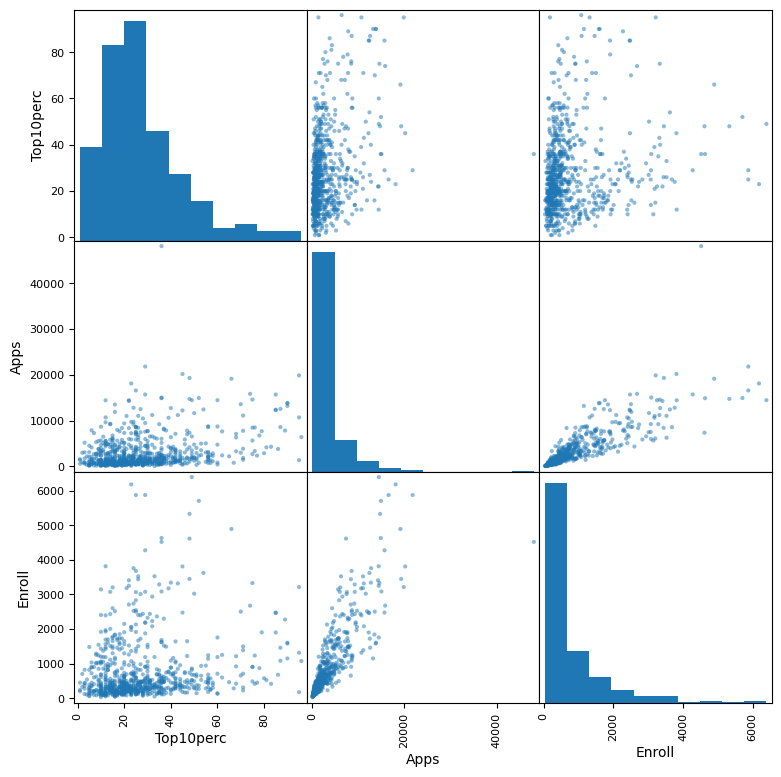

In [11]:
import matplotlib.pyplot as plt
cols = ['Top10perc', 'Apps', 'Enroll']
scatter_matrix(college[cols], figsize=(9, 9), diagonal='hist')
plt.show()

### Observation:
##### Top 10 Percentage
- Fairly wide distribution, with the majority of values ​​between 10 and 50%.
- A few highly selective institutions (60–100%), but these are rare.
**Interpretation** : Significant variability in the academic level of incoming students.
##### Applications
- Highly skewed distribution (strong right skew).
- Most colleges receive fewer than 10,000 applications, but a few extreme cases exceed 40,000.
**Interpretation** : A few very popular institutions pull the distribution upwards.
##### Enrollment
- Also a highly skewed distribution: most colleges have fewer than 2,000 applicants.
- A few very large universities
**Interpretation**: Strong heterogeneity in size.

e) Side by side **boxplot()** of outstate vs private

Text(0.5, 0.98, '')

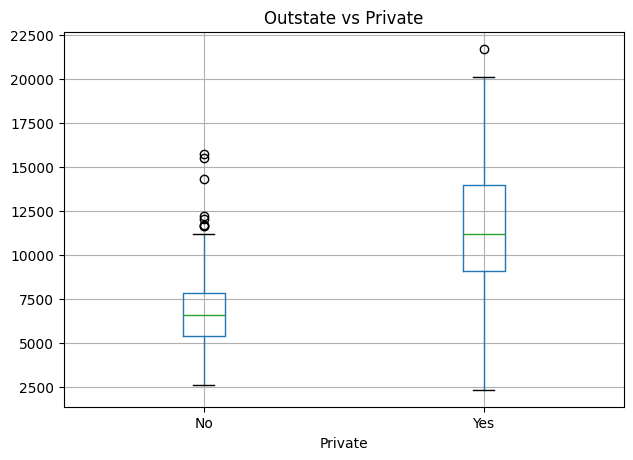

In [12]:
fig, ax = subplots(figsize=(7, 5))
college.boxplot(column='Outstate', by='Private', ax=ax)
ax.set_title('Outstate vs Private')
fig.suptitle('')   # enlever le titre automatique

f) Qualitative variable Elite

In [13]:
college['Elite'] = pd.cut(college['Top10perc'],[0,0.5,1], labels=['No', 'Yes'])

In [14]:
college['Elite'].value_counts()

Elite
Yes    3
No     0
Name: count, dtype: int64

Text(0.5, 0.98, '')

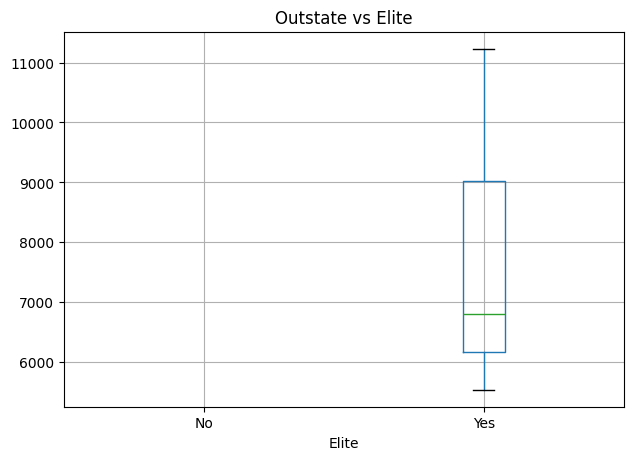

In [15]:
fig, ax = subplots(figsize=(7, 5))
college.boxplot(column='Outstate', by='Elite', ax=ax)
ax.set_title('Outstate vs Elite')
fig.suptitle('') 

g) Histograms for quatitative variables

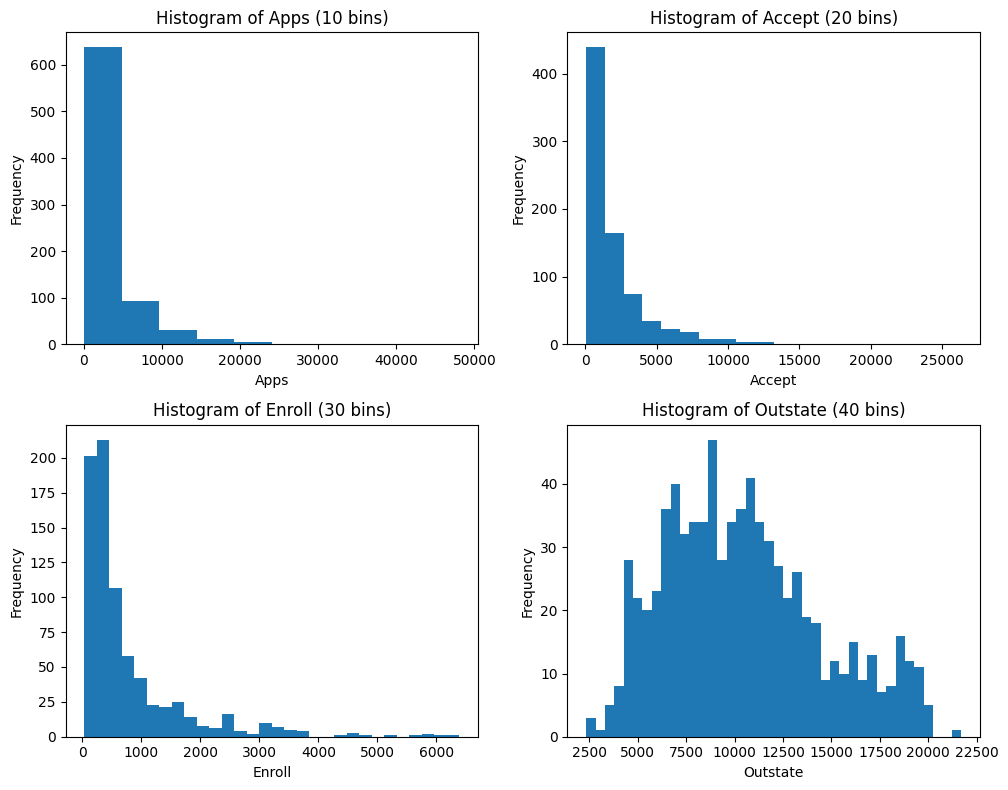

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

quant_vars = ['Apps', 'Accept', 'Enroll', 'Outstate']
bins_list  = [10, 20, 30, 40]   # différents nombres de bins

for ax, var, b in zip(axes.flatten(), quant_vars, bins_list):
    college[var].plot.hist(bins=b, ax=ax)
    ax.set_title(f"Histogram of {var} ({b} bins)")
    ax.set_xlabel(var)

plt.tight_layout()
plt.show()


### h ) Brief summary .

- Application-related variables (Apps, Accept, Enroll) are heavily skewed to the right.
- Outstate tuition is more balanced and roughly normal in distribution- 

## Chapter 3  : Applied exercise 9 

In [17]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

#### a) Linear regression with mpg

In [18]:
auto = load_data('Auto')

In [19]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

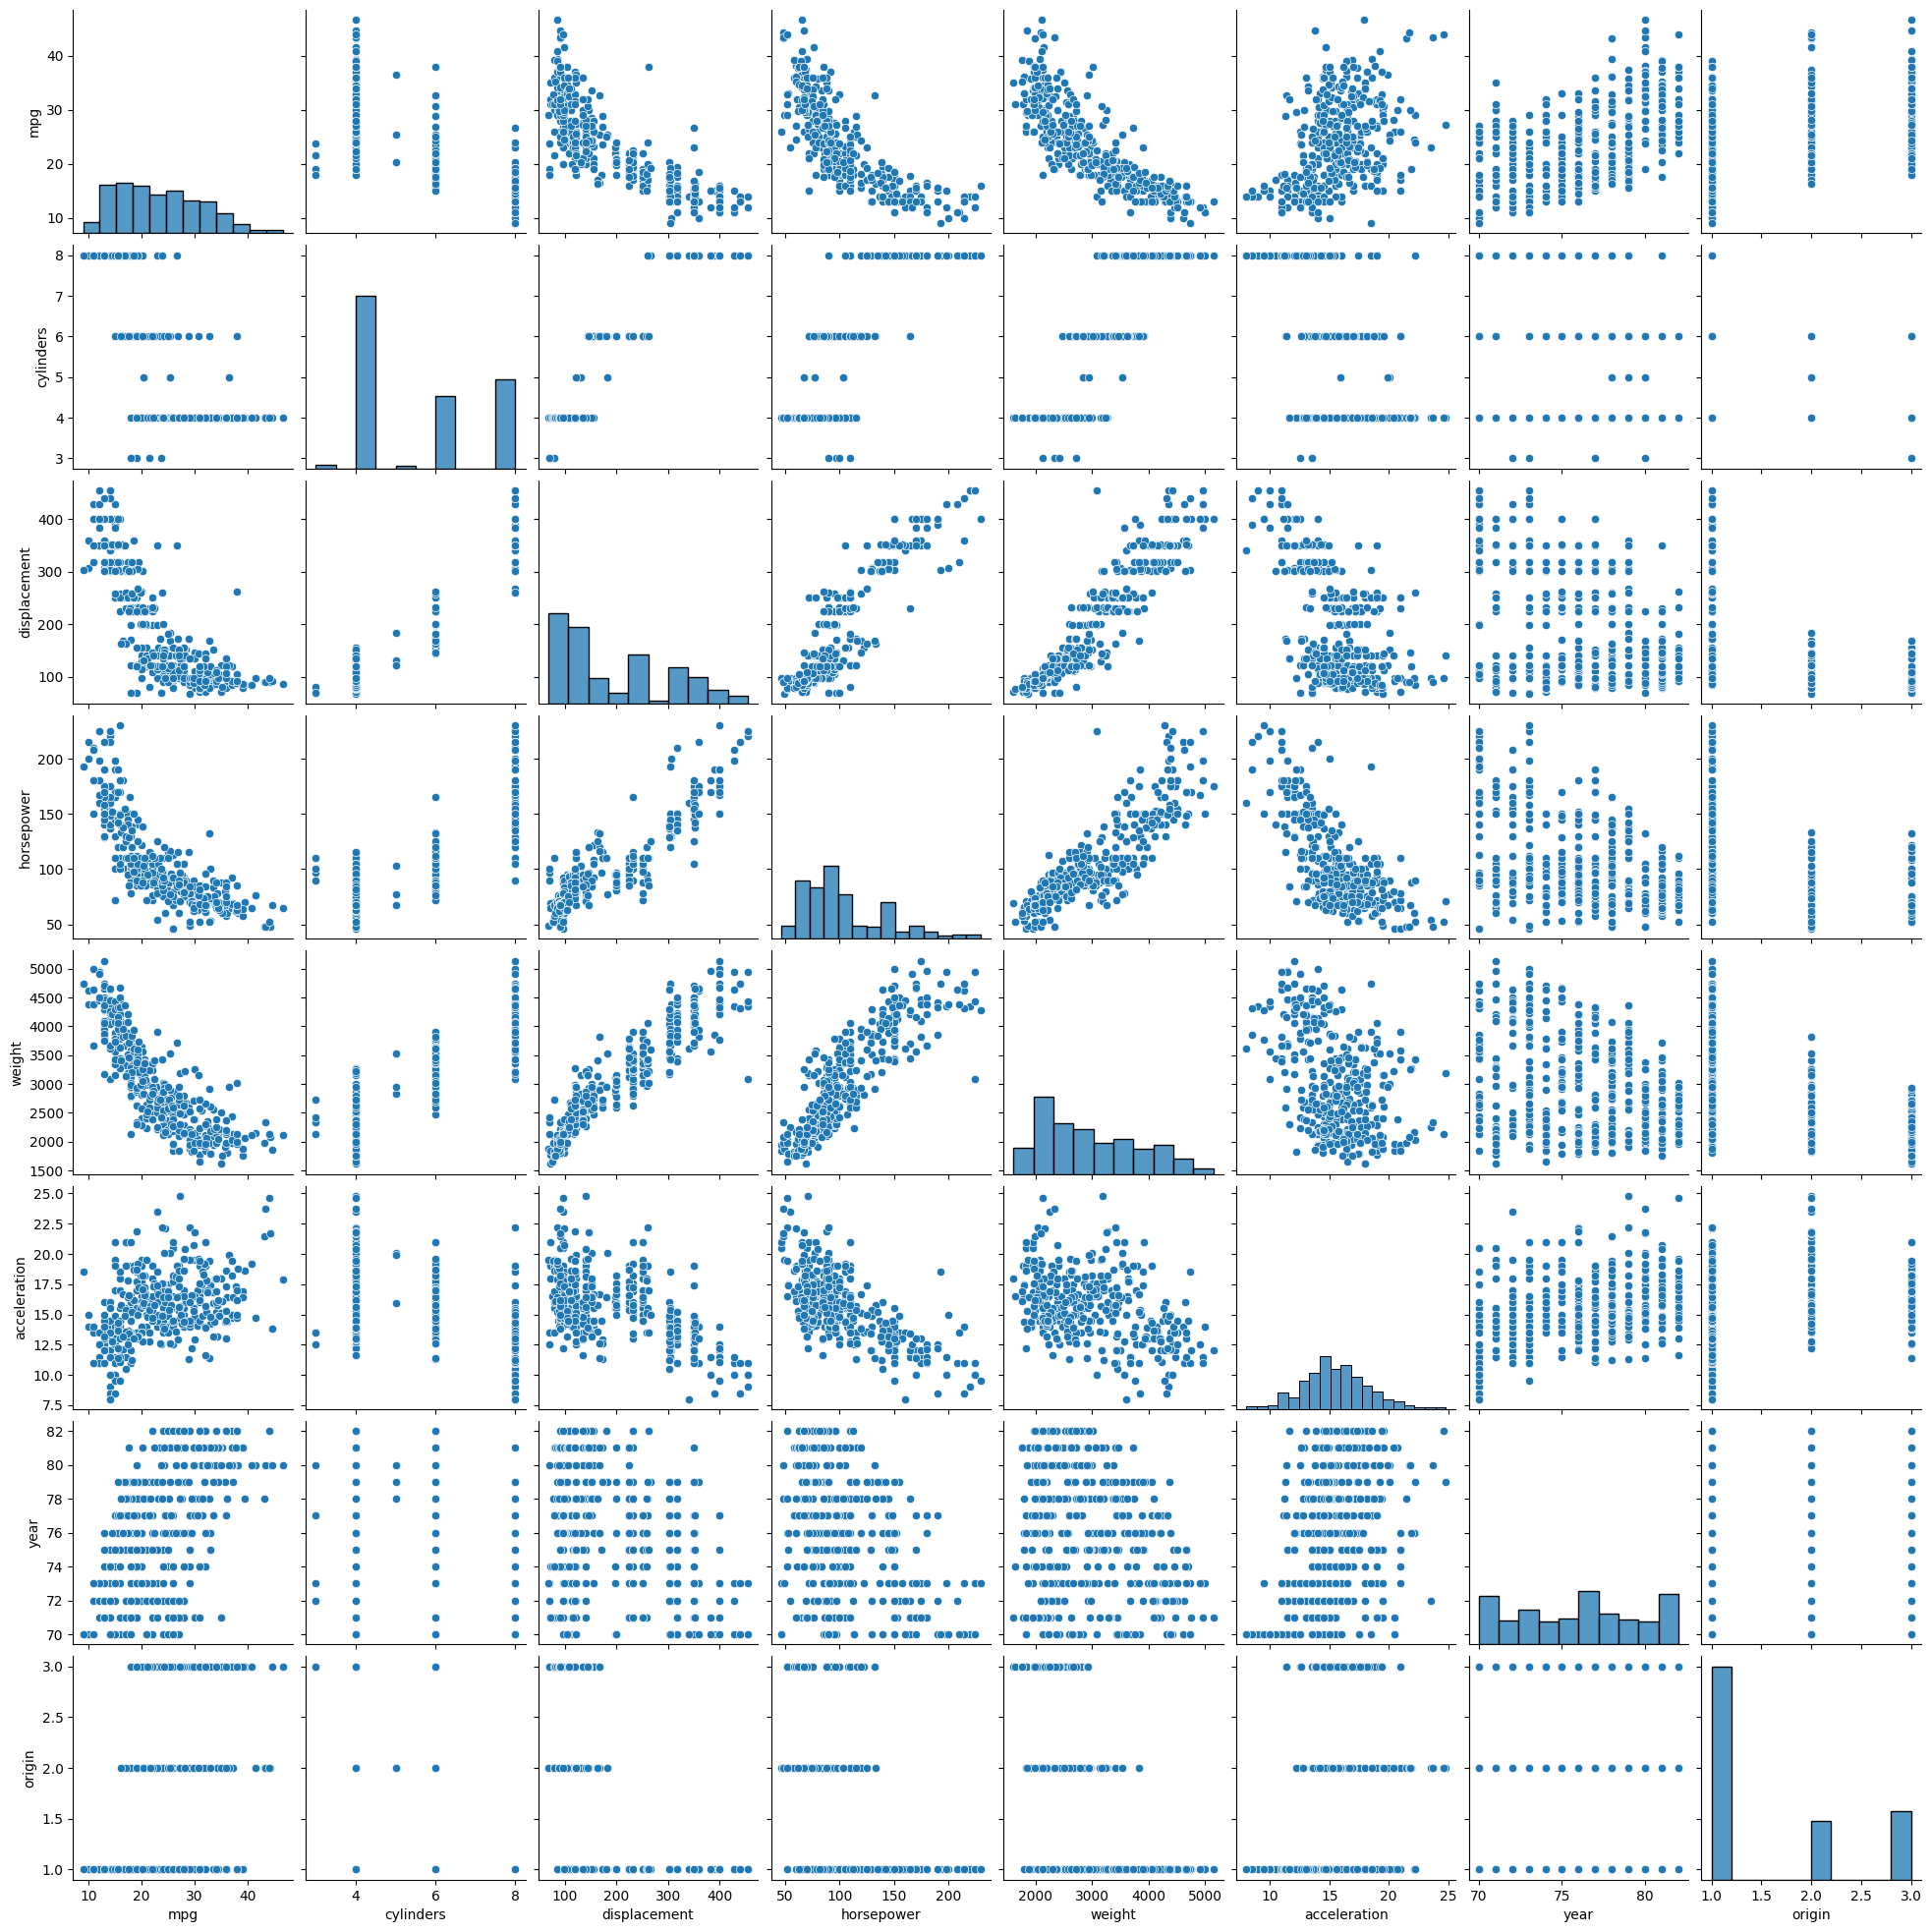

In [20]:
# Scatterplot matrix (pairplot) avec toutes les variables
sns.pairplot(auto)
plt.show()

In [21]:
# (b) Calcul de la matrice de corrélation
corr_matrix  = auto.corr()
print("Matrice de corrélation :\n", corr_matrix)

Matrice de corrélation :
                    mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.00

**Interpretation**:
- The correlation matrix shows that mpg is strongly and negatively correlated with weight (-0.83), displacement (-0.80), cylinders (-0.78), and horsepower (-0.78). 
This means that heavier cars, with larger engines and more power, have higher fuel consumption and therefore lower mpg.
- Year and origin show moderate and positive correlations with mpg, indicating that newer cars or those of European/Japanese origin have better fuel economy.
- Acceleration is weakly correlated with mpg and is therefore not a very good predictor of mpg.
- Finally, strong correlations between cylinders, displacement, horsepower, and weight indicate significant multicollinearity among these variables.

In [22]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [23]:
X = auto.drop(['mpg'], axis=1)

X = sm.add_constant(X)
y = auto['mpg']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        16:07:23   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [24]:
summarize(model)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


### i. Is there a relation between the predictor and the response

In [25]:
## Response on this question is yes, most of all variables has relationship with mpg

### ii Interpretation: All predictors except acceleration have a significant relationship with mpg.
- There is a strong relationship between most predictors and mpg.
- acceleration does not significantly affect mpg when controlling for the other variables.
- Variables like cylinders, weight, and year have the largest effect sizes..

### iii.The coefficient of the year variable in the regression model represents the average effect of one additional year on mpg, holding all other variables constant.
- If the coefficient is positive, it indicates that newer cars have higher fuel efficiency (higher mpg).

- For example, a coefficient of 0.75 means that each additional model year increases the average mpg by 0.75 miles per gallon, all else being equal.

(a) Produce a scatterplot matrix which includes all of the variables
 in the data set.

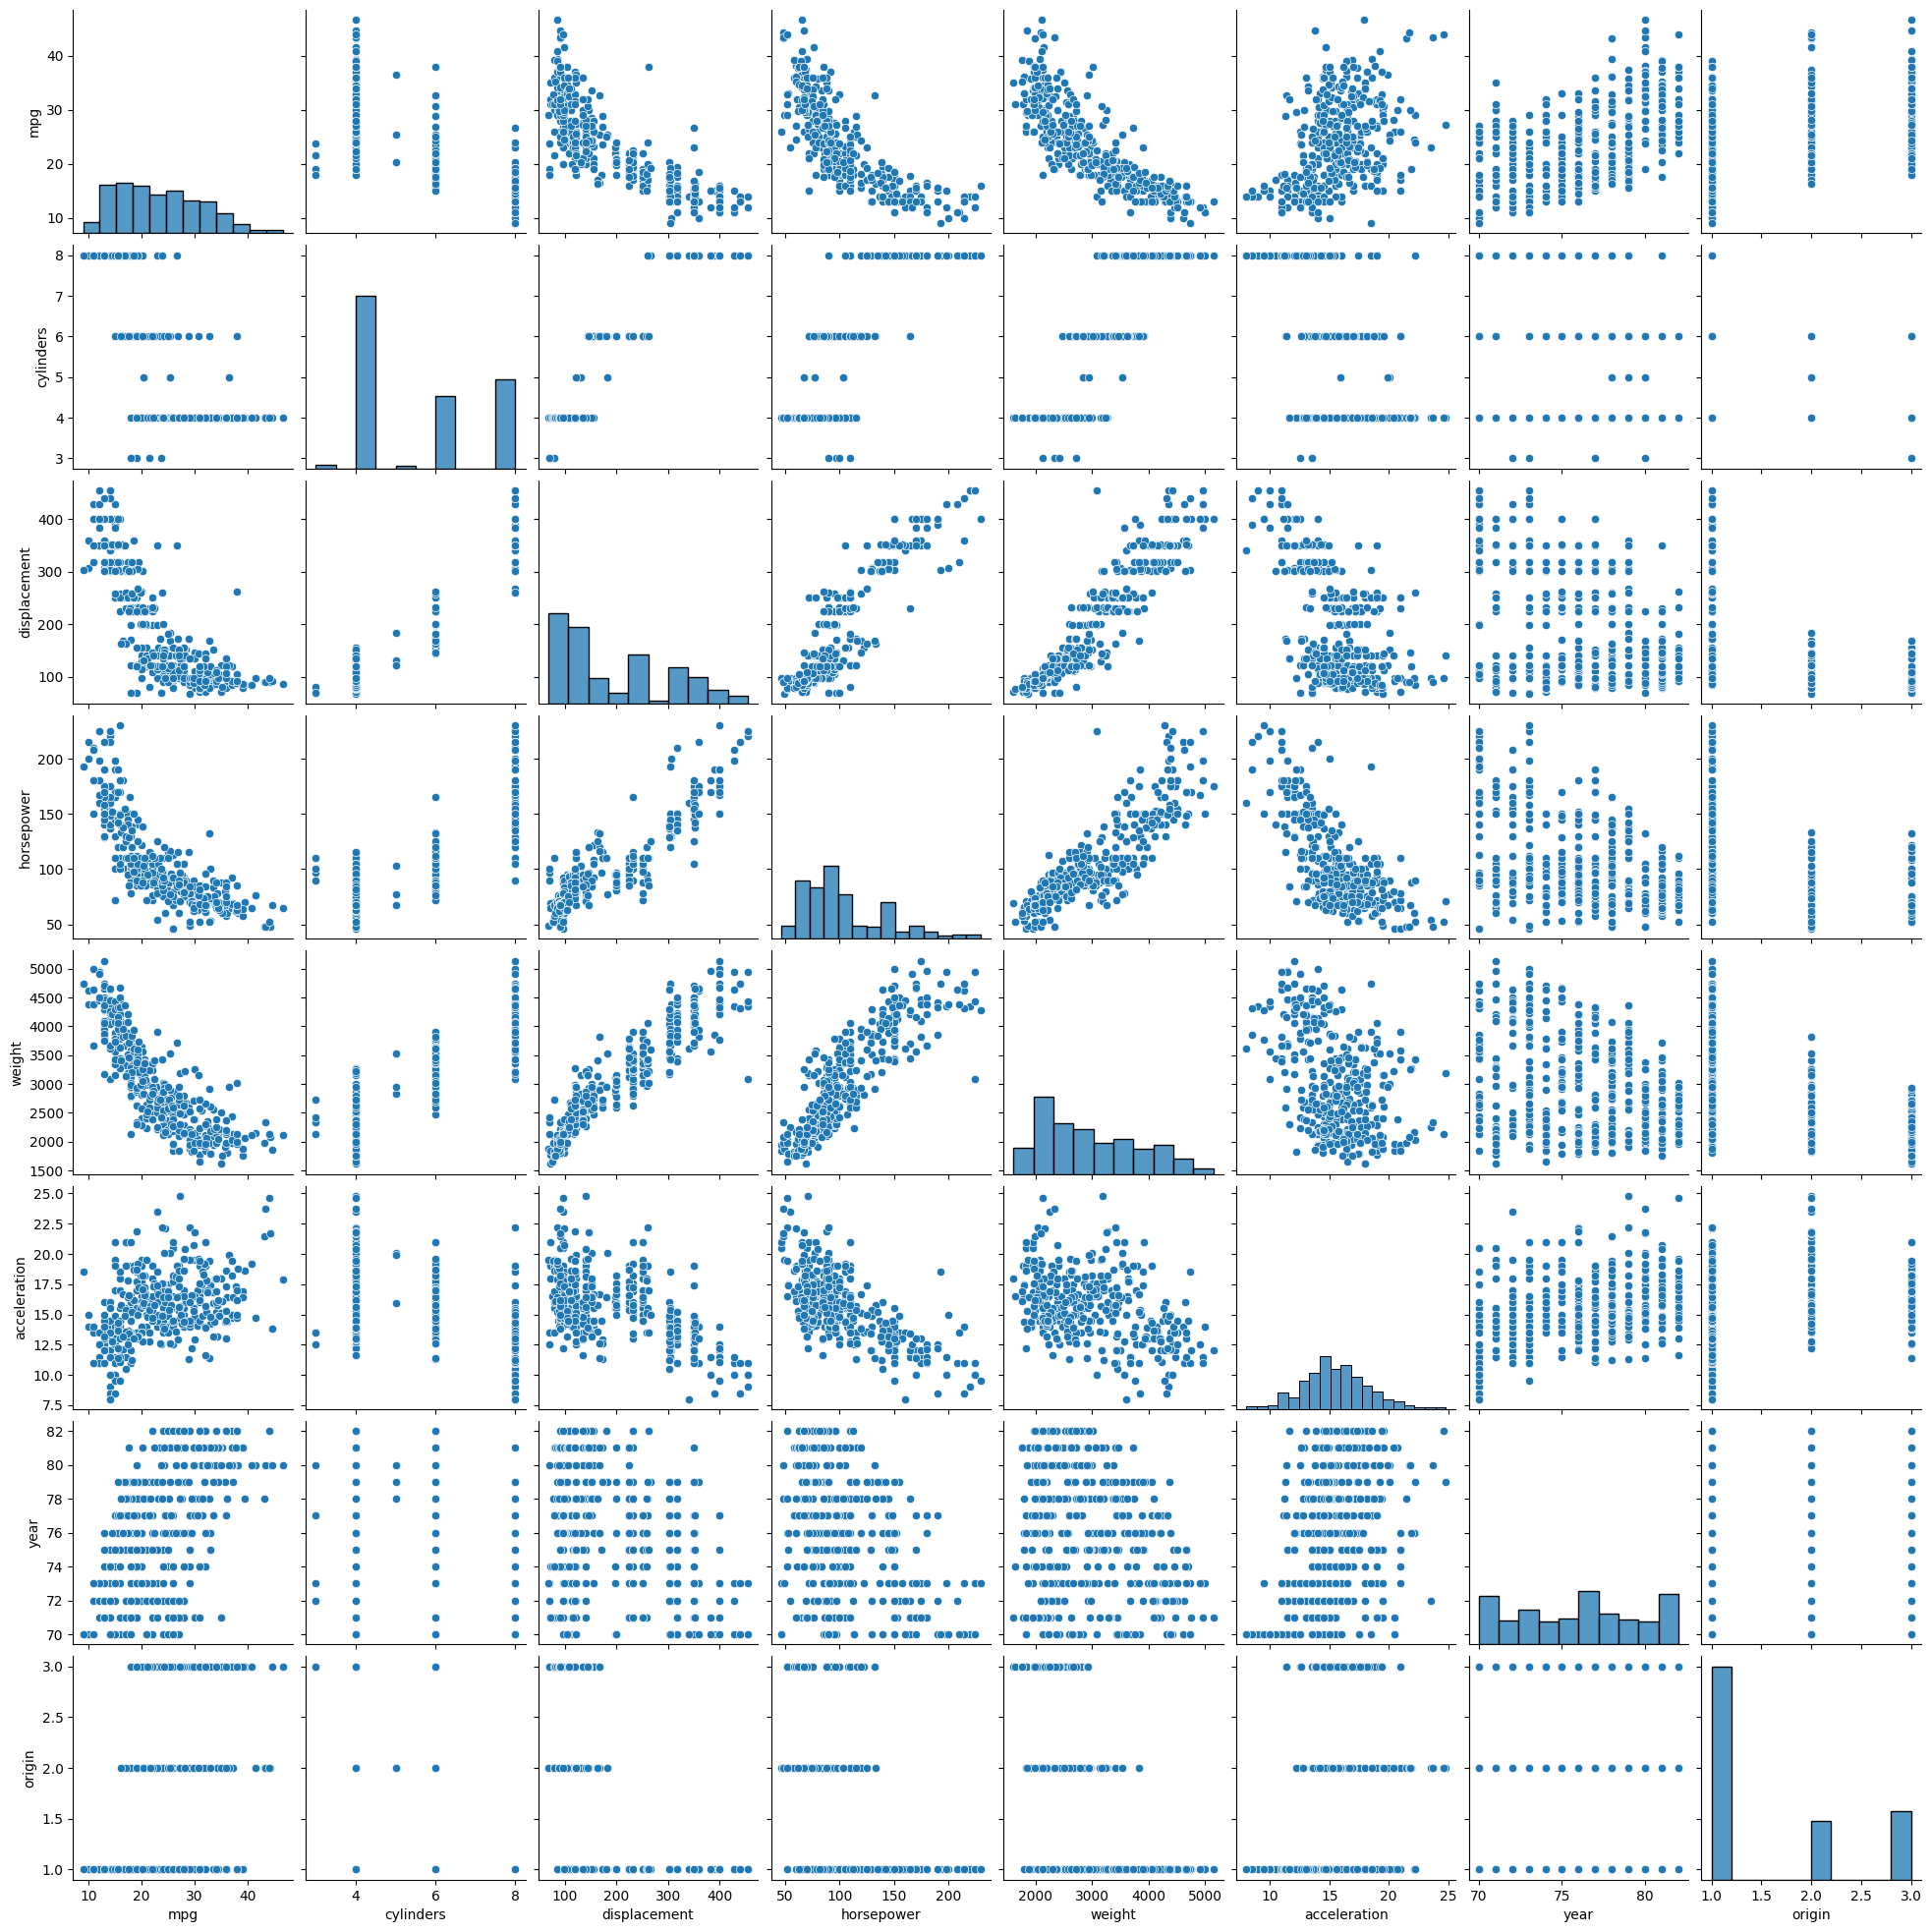

In [26]:
sns.pairplot(auto) 
plt.show()


### Interpretation (brief summary)
- We observe that mpg (fuel consumption) appears to increase when:
  -   weight decreases,
  - horsepower decreases,
  - the number of cylinders decreases,
  - the year increases.
- This already suggests a negative relationship between fuel consumption and horsepower/weight.

(b) correlation matrix

In [27]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### Interpretation
Key correlations:
- mpg & weight ≈ -0.83 → the heavier the car, the higher its fuel consumption.
- mpg & horsepower ≈ -0.78 → the higher the horsepower, the higher the fuel consumption.
- mpg & year ≈ +0.58 → newer cars consume less fuel (mpg ↑).
- weight & horsepower ≈ +0.86 → powerful cars are also heavier.

Many possible multicollinear relationships (correlation between predictors).

(c) Multiple lineair regression (OLS)

In [28]:
X = auto.drop(columns=["mpg"])
y = auto["mpg"]

# Ajouter constante
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          2.04e-139
Time:                        16:07:36   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
summarize(model)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [30]:
# (i)  Is there a relationship between the predictors and the response?
import statsmodels.formula.api as smf
df2 = auto
model = smf.ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=df2).fit()
#print(model.summary())

In [31]:
from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(model)
print(anova_results)


                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


**Interpretation**:
- Several p-values ​​are extremely small (< 10⁻²⁰).
- The overall model is therefore highly significant.
- The predictors explain a significant portion of the variation in mpg.

(ii)
The predictors that have a statistically significant relationship with mpg (p-value < 0.05) are:
- cylinders
- displacement
- horsepower
- weight
- year
- origin
The only predictor not statistically significant is:
- acceleration

(iii ) What does the coefficient for the year variable suggest?

 * The coefficient for year is positive, which means:
Newer cars tend to have higher mpg (better fuel efficiency).

More precisely:

- For each additional model year, the mpg increases by approximately 0.7 to 0.8 mpg (value depends on your exact regression output).
- This indicates a clear trend:
As the manufacturing year increases, cars become more fuel-efficient.

d) Diagnostic plots

In [33]:
import statsmodels.formula.api as smf

model_interaction = smf.ols(
    "mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin \
           + horsepower:weight + displacement:cylinders + year:origin",
    data=df2
).fit()

print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          4.43e-159
Time:                        16:07:38   Log-Likelihood:                -968.25
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     381   BIC:                             2002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21

### Chapter 4 : applied exercice 14

In [34]:
# Compute median of mpg
mpg_median = auto['mpg'].median()

# Create binary variable: 1 if mpg > median, 0 if mpg <= median
auto['mpg01'] = (auto['mpg'] > mpg_median).astype(int)

# Check the new column
print(auto[['mpg', 'mpg01']].head())

                            mpg  mpg01
name                                  
chevrolet chevelle malibu  18.0      0
buick skylark 320          15.0      0
plymouth satellite         18.0      0
amc rebel sst              16.0      0
ford torino                17.0      0


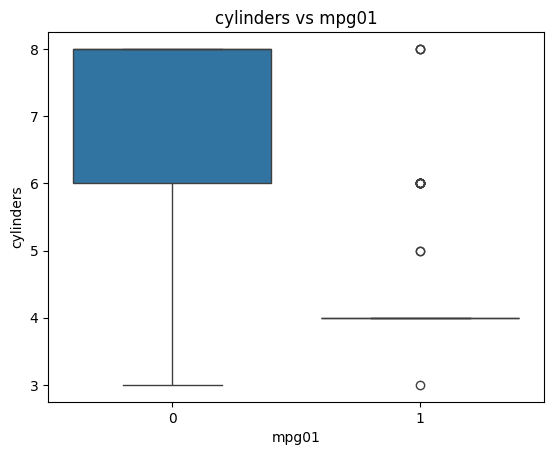

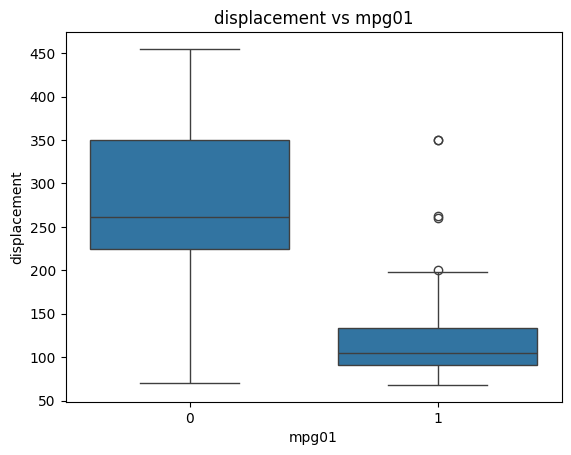

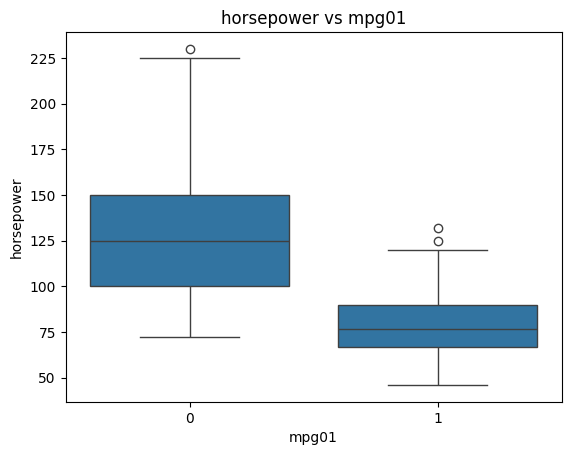

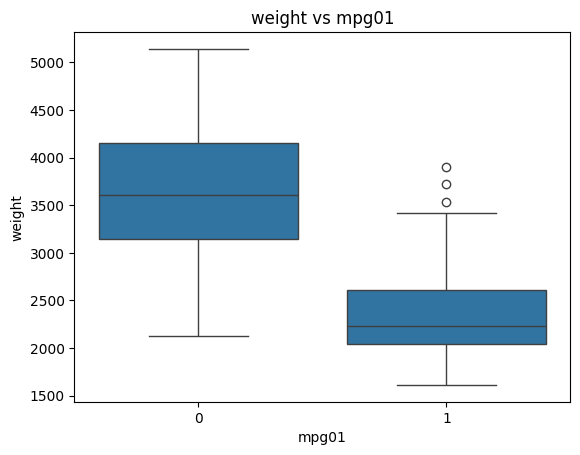

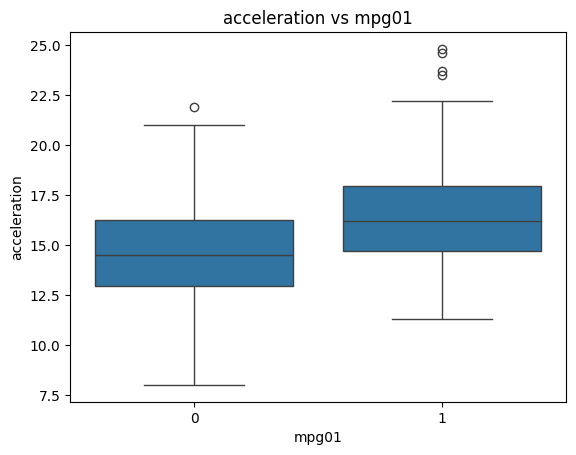

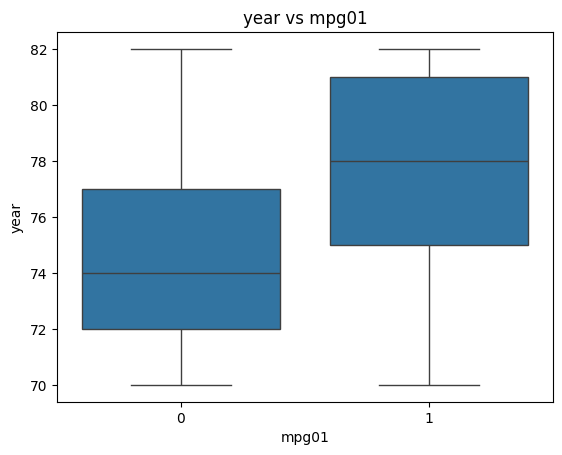

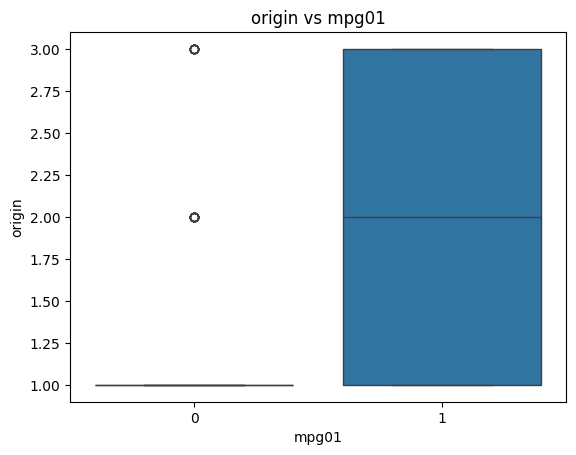

In [35]:
features = ["cylinders", "displacement", "horsepower", "weight", 
            "acceleration", "year", "origin"]

for col in features:
    sns.boxplot(x=auto["mpg01"], y=auto[col])
    plt.title(f"{col} vs mpg01")
    plt.show()

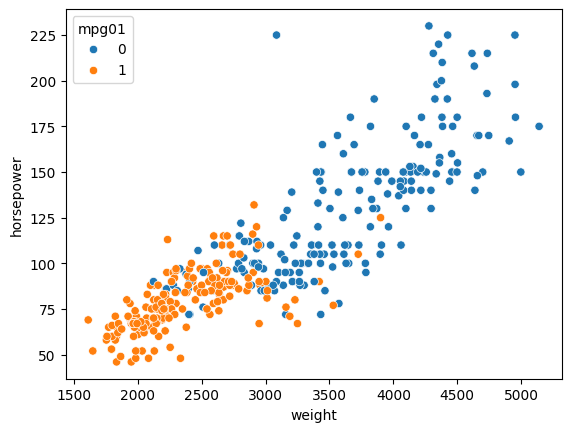

In [36]:
sns.scatterplot(x="weight", y="horsepower", hue="mpg01", data=auto)
plt.show()


Based on the boxplots and scatterplots, 
- several predictors show a clear separation between cars with high mpg (mpg01 = 1) and low mpg (mpg01 = 0).

- Weight, horsepower, displacement, and cylinders display strong differences between the two groups. Cars with low weight, low horsepower, and small displacement generally have high mpg, while heavier and more powerful cars tend to have low mpg.
- Year also shows a trend: more recent cars are more likely to have high mpg.
- Acceleration does not show any strong difference between the two classes.
Therefore, the most promising features for predicting mpg01 are weight, horsepower, displacement, cylinders, and year.

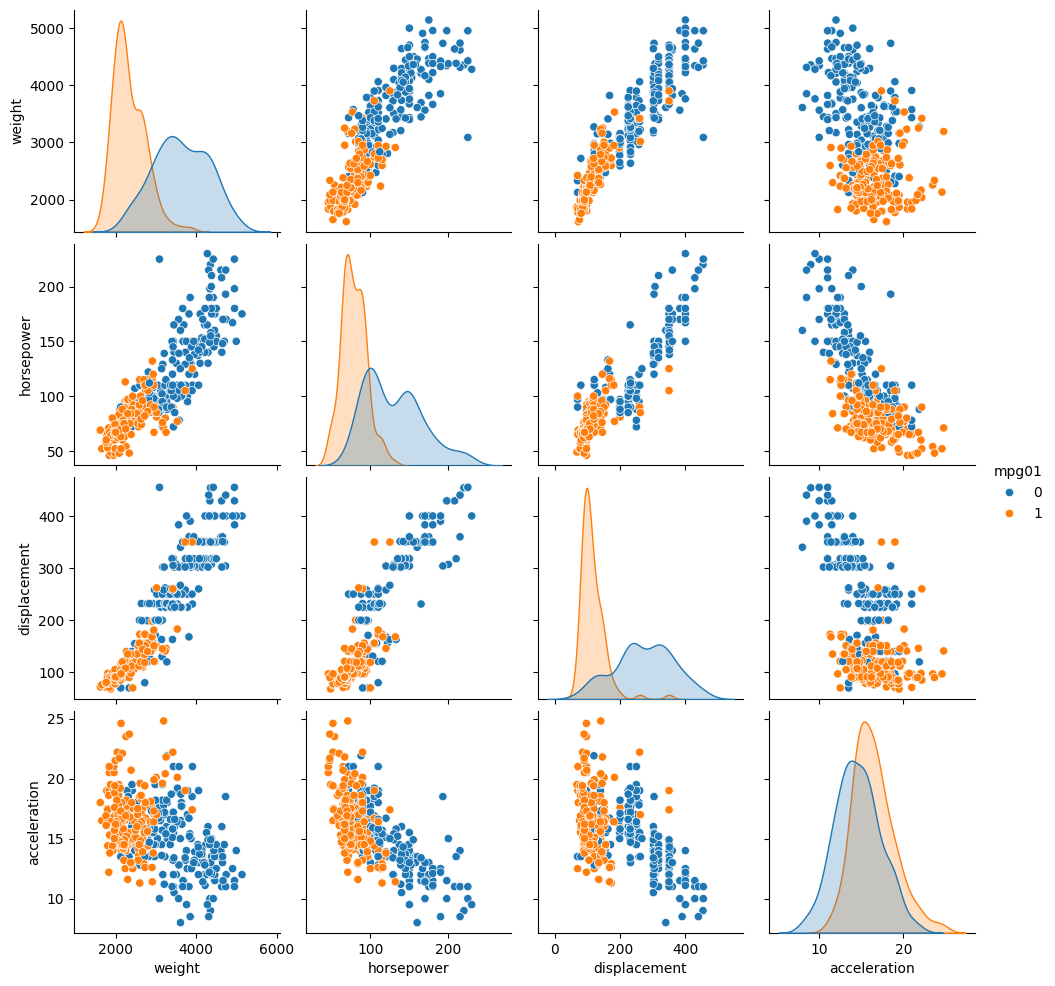

In [37]:
sns.pairplot(auto, vars=["weight","horsepower","displacement","acceleration"], hue="mpg01")
plt.show()


### Exploration
- Graphical analysis shows that the variables weight, horsepower, and displacement are most strongly associated with mpg01.
- Cars with a high mpg (mpg01 = 1) are generally lighter, less powerful, and have a smaller engine displacement.
Variables such as acceleration or year appear less informative for predicting mpg01.

### c) split into test data and training data

In [38]:
import numpy as np

np.random.seed(1)
# total number of observation
n = auto.shape[0]
# training indices
train_indices = np.random.choice(n, size=int(2*n/3), replace=False)

# Creation of dataset
auto_train = auto.iloc[train_indices]
auto_test = auto.drop(auto.index[train_indices])


### f) Perform Logistic regression

In [39]:
features = ["weight", "horsepower", "displacement"]

X_train = auto_train[features]
y_train = auto_train["mpg01"]

X_test = auto_test[features]
y_test = auto_test["mpg01"]


In [40]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [41]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()
probs = result.predict(exog=X_test)

print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  mpg01   No. Observations:                  261
Model:                            GLM   Df Residuals:                      257
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70.855
Date:                Sun, 23 Nov 2025   Deviance:                       141.71
Time:                        16:07:45   Pearson chi2:                     361.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.6258      1.916      6.067   

In [42]:
summarize(result)

,coef,std err,z,P>|z|
const,11.6258,1.916,6.067,0.000
weight,-0.0019,0.001,-2.357,0.018
horsepower,-0.0488,0.017,-2.847,0.004
displacement,-0.0097,0.006,-1.560,0.119


## Interpretation
- Weight and horsepower are significant predictors: the higher these values, the lower the probability of mpg01=1.
- Displacement is not statistically significant, so its effect on mpg01 is unclear in this model.
- The negative sign of the coefficients indicates that higher values ​​of these variables reduce the probability of mpg01=1.

In [43]:
result.pvalues

const           1.301055e-09
weight          1.841275e-02
horsepower      4.406532e-03
displacement    1.187138e-01
dtype: float64

In [44]:
pred_labels = (probs > 0.5).astype(int)

In [45]:
test_error = (pred_labels != y_test).mean()
print("Test error:", test_error)

Test error: 0.14285714285714285


## I've got rate 14% for test error

## Chapter 5 : Applied exercises 5 and 6

### Exercice 5 : 

In [46]:
from sklearn.model_selection import train_test_split

# Pour la reproductibilité
np.random.seed(42)

In [47]:

default = pd.read_csv("./data/Default.csv")
default.shape

(10000, 4)

In [48]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [49]:
# Coder la variable cible en 0/1 (si nécessaire)
default['default'] = default['default'].map({'Yes': 1, 'No': 0})

In [50]:
default.head()

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879


In [51]:
## a.  
X = default[['income', 'balance']]
y = default['default']

X = sm.add_constant(X)


In [52]:
## i. split the model
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.5, random_state=42
)

In [53]:
## ii. fit the model a multiple regression
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
glm_result = glm.fit()
print(glm_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.46
Date:                Sun, 23 Nov 2025   Deviance:                       784.93
Time:                        16:07:46   Pearson chi2:                 4.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1351
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9681      0.640    -18.688      0.0

In [54]:
summarize(glm_result)

,coef,std err,z,P>|z|
const,-11.968100,0.640000,-18.688,0.000
income,0.000019,0.000007,2.766,0.006
balance,0.006000,0.000000,17.665,0.000


## Interpreation 
- Balance is the dominant factor in predicting default.
- Income has a positive but very small effect.
- Both variables are statistically significant (p < 0.01).
- The model shows that the probability of default increases primarily with a higher balance.

In [55]:
## iii. Prediction of model 
pred_probs = glm_result.predict(X_valid)
pred_labels = (pred_probs > 0.5).astype(int)

In [56]:
### iv. compute validation error
validation_error = (pred_labels != y_valid).mean()
print("Validation set error:", validation_error)

Validation set error: 0.0258


In [57]:
## c. 
# reload data
default2 = pd.read_csv("./data/Default.csv")
default2['default'] = default2['default'].map({'Yes': 1, 'No': 0})

X = default2[['income', 'balance']]
y = default2['default']
X = sm.add_constant(X)

validation_errors = []

# Repeated for 3 times
for seed in [1, 2, 3]:
    np.random.seed(seed)
    
    # Split train/validation
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.5, random_state=seed
    )
    
    # Fit logistic model
    glm = sm.GLM(y_train, X_train, family=sm.families.Binomial())
    glm_result = glm.fit()
    
    # Predict on validation set
    pred_probs = glm_result.predict(X_valid)
    pred_labels = (pred_probs > 0.5).astype(int)
    
    # Compute validation error
    val_error = (pred_labels != y_valid).mean()
    validation_errors.append(val_error)
    print(f"Seed {seed}: Validation set error = {val_error:.4f}")

# summary des erreurs
print("\nValidation errors for the three splits:", validation_errors)
print("Mean validation error:", np.mean(validation_errors))



Seed 1: Validation set error = 0.0250
Seed 2: Validation set error = 0.0248
Seed 3: Validation set error = 0.0248

Validation errors for the three splits: [0.025, 0.0248, 0.0248]
Mean validation error: 0.024866666666666665


## Interpretation : 
- Only ~2.5% of observations in the validation set were misclassified.
- The errors are very similar across the three splits, demonstrating that the test error estimation is robust to the choice of training/validation set.
- The logistic model using income and balance predicts default very well, with a very low misclassification rate.

In [58]:
default2 = pd.read_csv("./data/Default.csv")

In [59]:
default2 = default2.dropna()
# Coder la variable cible et la variable dummy
default2['default'] = default2['default'].map({'Yes': 1, 'No': 0})
default2['student'] = default2['student'].map({'Yes': 1, 'No': 0})

# Définir les prédicteurs et la cible
XX = default2[['income', 'balance', 'student']]
yy = default2['default']
# Ajouter la constante
XX = sm.add_constant(X)


In [60]:
#step 1 
np.random.seed(42)  # pour reproductibilité
XX_train, XX_valid, yy_train, yy_valid = train_test_split(
    XX, yy, test_size=0.5, random_state=42
)


In [61]:
#step 2 
glm = sm.GLM(yy_train, XX_train, family=sm.families.Binomial())
glm_result = glm.fit()
print(glm_result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.46
Date:                Sun, 23 Nov 2025   Deviance:                       784.93
Time:                        16:07:47   Pearson chi2:                 4.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1351
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9681      0.640    -18.688      0.0

In [62]:
summarize(glm_result)

,coef,std err,z,P>|z|
const,-11.968100,0.640000,-18.688,0.000
income,0.000019,0.000007,2.766,0.006
balance,0.006000,0.000000,17.665,0.000


## Interpretation 
- Balance is the most important factor in predicting default.
- Income has a very small but statistically significant effect.
- The model captures some of the variability (pseudo R² ≈ 0.135), but there is still a lot of unexplained information (as expected for this type of data).

In [63]:
# step 3 
pred_probs = glm_result.predict(XX_valid)
pred_labels = (pred_probs > 0.5).astype(int)

In [64]:
# step 4
validation_error = (pred_labels != yy_valid).mean()
print("Validation set error with student dummy:", validation_error)

Validation set error with student dummy: 0.0258


### Exercise 6 : 

In [65]:
se_income = glm_result.bse['income']
se_balance = glm_result.bse['balance']
print("Standard error (income):", se_income)
print("Standard error (balance):", se_balance)

Standard error (income): 6.9909020725293e-06
Standard error (balance): 0.00033737129718968984


In [ ]:
def boot_fn(data, indices):
    """
    Function for the bootstrap:
        - data: dataframe
        - indices: list of indices to use for the bootstrap sample
    Returns: coefficients for income and balance
    """
    sample = data.iloc[indices]
    X_boot = sample[['income', 'balance']]
    y_boot = sample['default']
    X_boot = sm.add_constant(X_boot)
    
    glm_boot = sm.GLM(y_boot, X_boot, family=sm.families.Binomial()).fit()
    return glm_boot.params[['income', 'balance']]


In [67]:
B = 1000 
coefs = []

n = len(default2)
for b in range(B):
    # Échantillon bootstrap avec remplacement
    indices = np.random.choice(n, n, replace=True)
    coefs.append(boot_fn(default2, indices))

# Convert into dataframe for compute
coefs_df = pd.DataFrame(coefs)

# Standard errors bootstrap
se_income_boot = coefs_df['income'].std()
se_balance_boot = coefs_df['balance'].std()

print("Bootstrap SE (income):", se_income_boot)
print("Bootstrap SE (balance):", se_balance_boot)


Bootstrap SE (income): 4.9710729968978266e-06
Bootstrap SE (balance): 0.00023220837558377306


## Interpretation [Conclusion]
- The income coefficient is very stable and has little influence on default.
- The balance coefficient is more variable but remains very accurate.
- In this dataset, balance is clearly the dominant predictor of default.
- These results are consistent with what is often observed in the Default dataset: the income variable does not provide much information, while balance is highly predictive.